In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Totaldataset=pd.read_csv("/content/drive/MyDrive/emails.csv")

In [ ]:
Totaldataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517401 entries, 0 to 517400
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   file     517401 non-null  object
 1   message  517401 non-null  object
dtypes: object(2)
memory usage: 7.9+ MB


In [ ]:
dataset1=Totaldataset[: 10000]

In [ ]:
dataset1.head()

,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...


In [ ]:
dataset2=Totaldataset[10001:20001]

In [ ]:
dataset2.head()

,file,message
10001,bass-e/_sent_mail/1052.,Message-ID: <25539007.1075854731617.JavaMail.e...
10002,bass-e/_sent_mail/1053.,Message-ID: <5807997.1075854731640.JavaMail.ev...
10003,bass-e/_sent_mail/1054.,Message-ID: <5164249.1075854731663.JavaMail.ev...
10004,bass-e/_sent_mail/1055.,Message-ID: <23780234.1075854731684.JavaMail.e...
10005,bass-e/_sent_mail/1056.,Message-ID: <7568703.1075854731706.JavaMail.ev...


In [ ]:
dataset1.shape,dataset2.shape

((10000, 3), (10000, 2))

In [ ]:
dataset1['sender'] = dataset1['file'].str.split('/').str[0]
dataset1['sender']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0       allen-p
1       allen-p
2       allen-p
3       allen-p
4       allen-p
         ...   
9995     bass-e
9996     bass-e
9997     bass-e
9998     bass-e
9999     bass-e
Name: sender, Length: 10000, dtype: object

In [ ]:
dataset2['sender'] = dataset2['file'].str.split('/').str[0]
dataset2['sender']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


10001        bass-e
10002        bass-e
10003        bass-e
10004        bass-e
10005        bass-e
            ...    
19996    baughman-d
19997    baughman-d
19998    baughman-d
19999    baughman-d
20000    baughman-d
Name: sender, Length: 10000, dtype: object

In [ ]:
sender1 = dataset1.groupby('sender').sender.count()
sender1

sender
allen-p     3034
arnold-j    4898
arora-h      654
badeer-r     877
bailey-s     478
bass-e        59
Name: sender, dtype: int64

In [ ]:
sender2 = dataset2.groupby('sender').sender.count()
sender2

sender
bass-e        7763
baughman-d    2237
Name: sender, dtype: int64

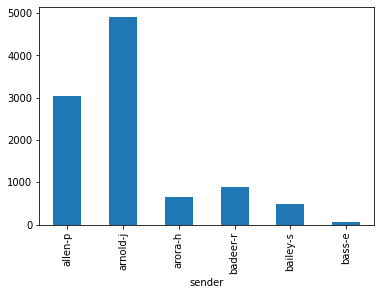

In [ ]:
dataset1.groupby('sender').sender.count().plot.bar(ylim=0)
plt.show()

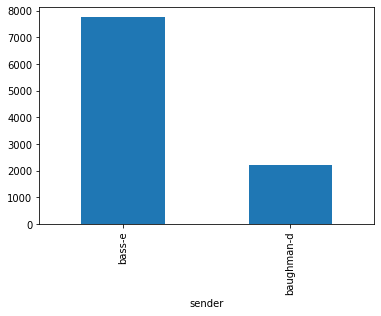

In [ ]:
dataset2.groupby('sender').sender.count().plot.bar(ylim=0)
plt.show()

In [ ]:
sender1 = dataset1['sender'].to_list()

# using naive method to remove duplicated from list  
list_sender1 = [] 
for i in sender1: 
    if i not in list_sender1: 
        list_sender1.append(i)
    
print(len(list_sender1))

6


In [ ]:
from collections import Counter

s = dataset1.sender
counts = Counter(s)
print(dict(counts))

{'allen-p': 3034, 'arnold-j': 4898, 'arora-h': 654, 'badeer-r': 877, 'bailey-s': 478, 'bass-e': 59}


In [ ]:
send_df1 = pd.DataFrame.from_dict(counts, orient='index').reset_index().sort_values(0, ascending=False)
send_df1 = send_df1.rename(columns={'index':'sender', 0:'count'})
send_df1

,sender,count
1,arnold-j,4898
0,allen-p,3034
3,badeer-r,877
2,arora-h,654
4,bailey-s,478
5,bass-e,59


In [ ]:
name1 = send_df1.iloc[0]
name2 = send_df1.iloc[1]

print(name1)
print("")
print(name2)

sender    arnold-j
count         4898
Name: 1, dtype: object

sender    allen-p
count        3034
Name: 0, dtype: object


In [ ]:
name_a = name1[0]
name_b = name2[0]

print(name_a)
print("")
print(name_b)

arnold-j

allen-p


In [ ]:
include_email_1 = dataset1[dataset1['sender'].values == name_a] 
include_email_2 = dataset1[dataset1['sender'].values == name_b]
include_email_dataset1 = include_email_1.append(include_email_2)
include_email_dataset1

,file,message,sender
3034,arnold-j/_sent_mail/1.,Message-ID: <33025919.1075857594206.JavaMail.e...,arnold-j
3035,arnold-j/_sent_mail/10.,Message-ID: <19235579.1075857594400.JavaMail.e...,arnold-j
3036,arnold-j/_sent_mail/100.,Message-ID: <19835539.1075857596349.JavaMail.e...,arnold-j
3037,arnold-j/_sent_mail/101.,Message-ID: <12626409.1075857596370.JavaMail.e...,arnold-j
3038,arnold-j/_sent_mail/102.,Message-ID: <13844738.1075857596392.JavaMail.e...,arnold-j
...,...,...,...
3029,allen-p/straw/4.,Message-ID: <2055670.1075855692881.JavaMail.ev...,allen-p
3030,allen-p/straw/5.,Message-ID: <22141218.1075855692903.JavaMail.e...,allen-p
3031,allen-p/straw/6.,Message-ID: <8801794.1075855692924.JavaMail.ev...,allen-p
3032,allen-p/straw/7.,Message-ID: <23831327.1075855692946.JavaMail.e...,allen-p


In [ ]:
sender2 = dataset2['sender'].to_list()

# using naive method to remove duplicated from list  
list_sender2 = [] 
for i in sender2: 
    if i not in list_sender2: 
        list_sender2.append(i)
    
print(len(list_sender2))

2


In [ ]:
s = dataset2.sender
counts = Counter(s)
print(dict(counts))

{'bass-e': 7763, 'baughman-d': 2237}


In [ ]:
send_df2 = pd.DataFrame.from_dict(counts, orient='index').reset_index().sort_values(0, ascending=False)
send_df2 = send_df2.rename(columns={'index':'sender', 0:'count'})
send_df2

,sender,count
0,bass-e,7763
1,baughman-d,2237


In [ ]:
name1 = send_df2.iloc[0]
name2 = send_df2.iloc[1]

print(name1)
print("")
print(name2)

sender    bass-e
count       7763
Name: 0, dtype: object

sender    baughman-d
count           2237
Name: 1, dtype: object


In [ ]:
name_a = name1[0]
name_b = name2[0]

print(name_a)
print("")
print(name_b)

bass-e

baughman-d


In [ ]:
include_email_1 = dataset2[dataset2['sender'].values == name_a] 
include_email_2 = dataset2[dataset2['sender'].values == name_b]
include_email_dataset2 = include_email_1.append(include_email_2)
include_email_dataset2

,file,message,sender
10001,bass-e/_sent_mail/1052.,Message-ID: <25539007.1075854731617.JavaMail.e...,bass-e
10002,bass-e/_sent_mail/1053.,Message-ID: <5807997.1075854731640.JavaMail.ev...,bass-e
10003,bass-e/_sent_mail/1054.,Message-ID: <5164249.1075854731663.JavaMail.ev...,bass-e
10004,bass-e/_sent_mail/1055.,Message-ID: <23780234.1075854731684.JavaMail.e...,bass-e
10005,bass-e/_sent_mail/1056.,Message-ID: <7568703.1075854731706.JavaMail.ev...,bass-e
...,...,...,...
19996,baughman-d/power/cinergy_index/42.,Message-ID: <26006402.1075848338540.JavaMail.e...,baughman-d
19997,baughman-d/power/cinergy_index/43.,Message-ID: <9581829.1075848338562.JavaMail.ev...,baughman-d
19998,baughman-d/power/cinergy_index/44.,Message-ID: <14081697.1075848338585.JavaMail.e...,baughman-d
19999,baughman-d/power/cinergy_index/45.,Message-ID: <11686348.1075848338607.JavaMail.e...,baughman-d


In [ ]:
include_email_dataset1.to_csv("/content/drive/MyDrive/FA/Enron1.csv")

In [ ]:
include_email_dataset2.to_csv("/content/drive/MyDrive/FA/Enron2.csv")

In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

include_email_dataset1.sender = le.fit_transform(include_email_dataset1.sender)
include_email_dataset1

,file,message,sender
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,0
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,0
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,0
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,0
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,0
...,...,...,...
5195,arnold-j/deleted_items/32.,Message-ID: <18557889.1075852689175.JavaMail.e...,1
5196,arnold-j/deleted_items/320.,Message-ID: <22842527.1075852699074.JavaMail.e...,1
5197,arnold-j/deleted_items/321.,Message-ID: <18098632.1075852699098.JavaMail.e...,1
5198,arnold-j/deleted_items/322.,Message-ID: <12787075.1075852699120.JavaMail.e...,1


In [ ]:
include_email_dataset2.sender = le.fit_transform(include_email_dataset2.sender)
include_email_dataset2

,file,message,sender
5201,arnold-j/deleted_items/325.,Message-ID: <26780664.1075852699227.JavaMail.e...,0
5202,arnold-j/deleted_items/326.,Message-ID: <3478400.1075852699254.JavaMail.ev...,0
5203,arnold-j/deleted_items/327.,Message-ID: <9663777.1075852699331.JavaMail.ev...,0
5204,arnold-j/deleted_items/328.,Message-ID: <15652123.1075852699353.JavaMail.e...,0
5205,arnold-j/deleted_items/329.,Message-ID: <32044450.1075852699377.JavaMail.e...,0
...,...,...,...
9458,badeer-r/sent_items/4.,Message-ID: <9205575.1075861029430.JavaMail.ev...,1
9459,badeer-r/sent_items/5.,Message-ID: <32174404.1075861029451.JavaMail.e...,1
9460,badeer-r/sent_items/6.,Message-ID: <25551305.1075861029473.JavaMail.e...,1
9461,badeer-r/sent_items/7.,Message-ID: <11178092.1075861029495.JavaMail.e...,1


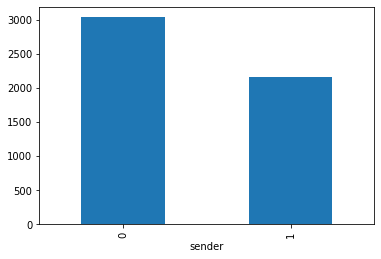

In [ ]:
include_email_dataset1.groupby('sender').sender.count().plot.bar(ylim=0)
plt.show()

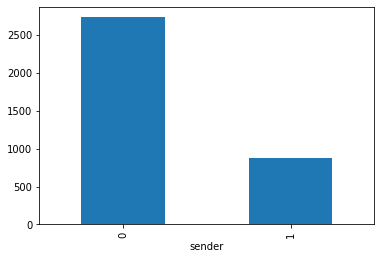

In [ ]:
include_email_dataset2.groupby('sender').sender.count().plot.bar(ylim=0)
plt.show()

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
words = stopwords.words("english")

include_email_dataset1['processed_text'] = include_email_dataset1['message'].apply(lambda x: " ".join([stemmer.stem(i) 
for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import string

#make all words lower case
include_email_dataset1['processed_text'] = include_email_dataset1['processed_text'].str.lower()

#Remove punctuation
#table = str.maketrans('', '', string.punctuation)
#include_email_dataset1['processed_text'] = [include_email_dataset1['processed_text'][row].translate(table) for row in range(len(include_email_dataset1['processed_text']))]

# remove hash tags
include_email_dataset1['processed_text'] = include_email_dataset1['processed_text'].str.replace("#", " ")

#remove words less than 1 character
include_email_dataset1['processed_text'] = include_email_dataset1['processed_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

In [ ]:
from collections import Counter
from itertools import chain

# split words into lists
v = include_email_dataset1['processed_text'].str.split().tolist() 
# compute global word frequency
c = Counter(chain.from_iterable(v))
# filter, join, and re-assign
include_email_dataset1['processed_text'] = [' '.join([j for j in i if c[j] > 1]) for i in v]

In [ ]:
y = include_email_dataset1.sender
X = include_email_dataset1['processed_text']

In [ ]:
include_email_dataset2['processed_text'] = include_email_dataset2['message'].apply(lambda x: " ".join([stemmer.stem(i) 
for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

In [ ]:
#make all words lower case
include_email_dataset2['processed_text'] = include_email_dataset2['processed_text'].str.lower()

#Remove punctuation
#table = str.maketrans('', '', string.punctuation)
#include_email_dataset2['processed_text'] = [include_email_dataset2['processed_text'][row].translate(table) for row in range(len(include_email_dataset2['processed_text']))]

# remove hash tags
include_email_dataset2['processed_text'] = include_email_dataset2['processed_text'].str.replace("#", " ")

#remove words less than 1 character
include_email_dataset2['processed_text'] = include_email_dataset2['processed_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

In [ ]:
# split words into lists
v = include_email_dataset2['processed_text'].str.split().tolist() 
# compute global word frequency
c = Counter(chain.from_iterable(v))
# filter, join, and re-assign
include_email_dataset2['processed_text'] = [' '.join([j for j in i if c[j] > 1]) for i in v]

In [ ]:
y1 = include_email_dataset2.sender
X1 = include_email_dataset2['processed_text']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.20, random_state=42, shuffle=True)
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((4160,), (4160,), (1040,), (1040,))

In [ ]:
X_train1, X_val1, y_train1, y_val1 = train_test_split(X1, y1, stratify=y1, test_size=0.20, random_state=42, shuffle=True)
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape

((2886,), (2886,), (722,), (722,))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
train_tfIdf = vectorizer_tfidf.fit_transform(X_train.values.astype('U'))
val_tfIdf = vectorizer_tfidf.transform(X_val.values.astype('U'))
print(vectorizer_tfidf.get_feature_names()[:5])

['aaa', 'aadam', 'aagudelo', 'aaii', 'aaiitu']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
train_tfIdf1 = vectorizer_tfidf.fit_transform(X_train1.values.astype('U'))
val_tfIdf1 = vectorizer_tfidf.transform(X_val1.values.astype('U'))
print(vectorizer_tfidf.get_feature_names()[:5])

['aaa', 'aadam', 'aagudelo', 'aagustin', 'aanoli']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
def model_train(train_tfIdf,val_tfIdf,y_train,y_val,n = 50):
    print("Random Forest for n_estimators =", n, end = "\n\n")
    rf = RandomForestClassifier(n_estimators = n)
    rf.fit(train_tfIdf,y_train)
    print("Train Accuracy :",rf.score(train_tfIdf,y_train))
    y_pred = rf.predict(val_tfIdf)
    print("Test Accuracy :",accuracy_score(y_val,y_pred), end = "\n\n")
    mat = confusion_matrix(y_val, y_pred)
    sns.heatmap(mat,annot=True)
    plt.show()
    print()
    return accuracy_score(y_val,y_pred)

Random Forest for n_estimators = 50

Train Accuracy : 1.0
Test Accuracy : 1.0



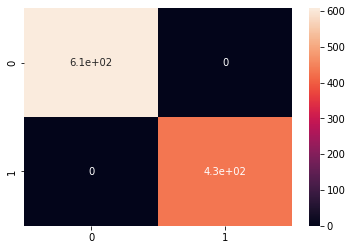


Random Forest for n_estimators = 100

Train Accuracy : 1.0
Test Accuracy : 0.9990384615384615



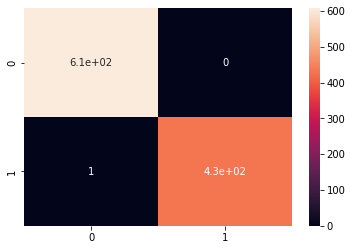


Random Forest for n_estimators = 150

Train Accuracy : 1.0
Test Accuracy : 1.0



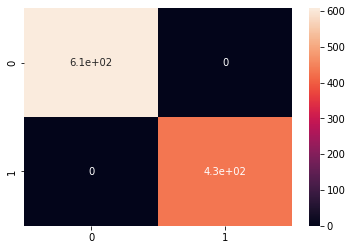

In [ ]:
acc1 = []
nvals = [50,100,150]
for i in nvals:
    acc1.append(model_train(train_tfIdf,val_tfIdf,y_train,y_val,i))

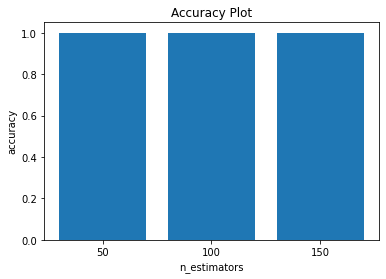

In [ ]:
plt.bar([str(i) for i in nvals], acc1)
plt.title("Accuracy Plot")
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.savefig("accuracy1.png")

Random Forest for n_estimators = 50

Train Accuracy : 1.0
Test Accuracy : 0.9958448753462604



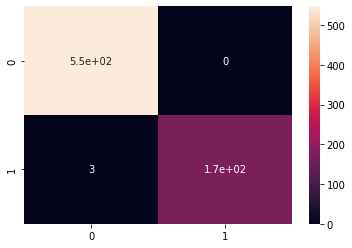


Random Forest for n_estimators = 100

Train Accuracy : 1.0
Test Accuracy : 0.9944598337950139



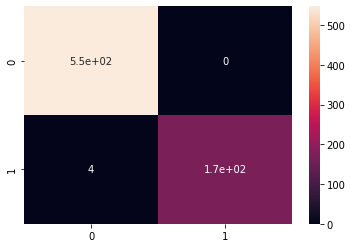


Random Forest for n_estimators = 150

Train Accuracy : 1.0
Test Accuracy : 0.9944598337950139



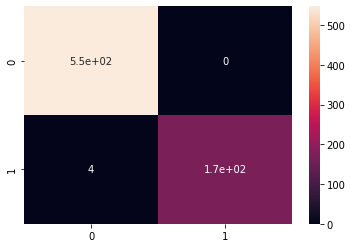

In [ ]:
acc2 = []
nvals = [50,100,150]
for i in nvals:
    acc2.append(model_train(train_tfIdf1,val_tfIdf1,y_train1,y_val1,i))

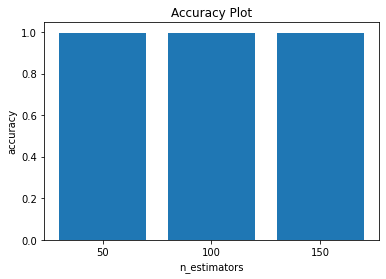

In [ ]:
plt.bar([str(i) for i in nvals], acc2)
plt.title("Accuracy Plot")
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.savefig("accuracy2.png")

In [ ]:
df_dic = {"estimators":nvals+nvals,"accuracy":acc1+acc2,"dataset":["dataset1"]*len(acc1)+["dataset2"]*len(acc2)}
df_dic

{'accuracy': [1.0,
  0.9990384615384615,
  1.0,
  0.9958448753462604,
  0.9944598337950139,
  0.9944598337950139],
 'dataset': ['dataset1',
  'dataset1',
  'dataset1',
  'dataset2',
  'dataset2',
  'dataset2'],
 'estimators': [50, 100, 150, 50, 100, 150]}

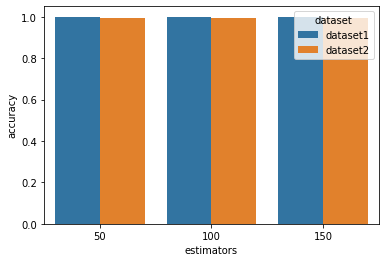

In [ ]:
sns.barplot(x = "estimators", y = "accuracy", hue = "dataset", data = pd.DataFrame(df_dic))